# House Price Prediction

# Task 3

 The task is to predict house prices based on various features such as the number of bedrooms, bathrooms, square footage, location, and other relevant attributes. The goal is to train a machine learning model that can accurately estimate house prices and assist in property valuation.



In [ ]:
# import neccessary liberary

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# import dataset 

In [12]:
df=pd.read_csv("BHP.csv")

In [13]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
df.shape

(13320, 9)

# Exploratory Data Analysis

In [ ]:
# information of the dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [19]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
# pair plot

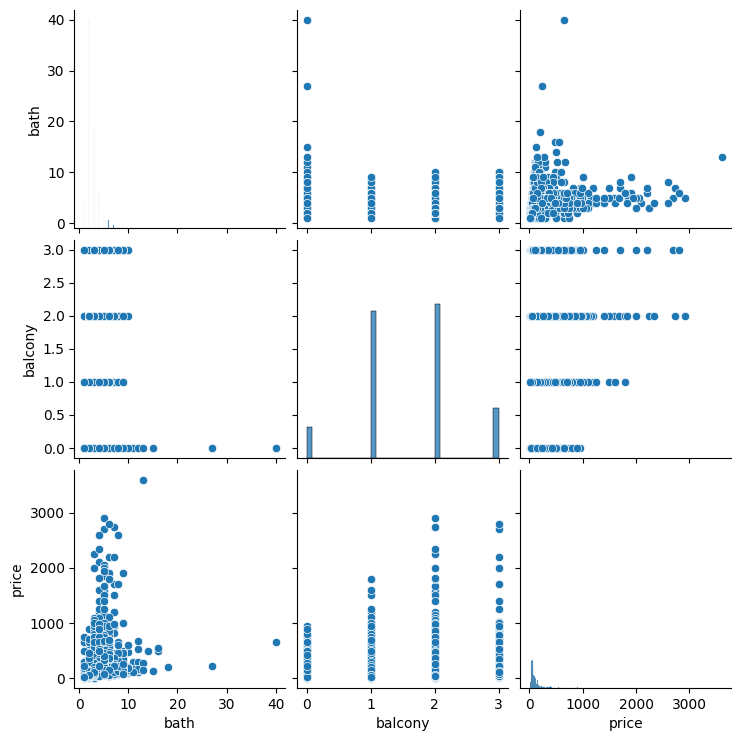

In [20]:
sns.pairplot(df)

In [21]:
# value count of each features

In [22]:
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("----------------------------------")

In [23]:
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
----------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
----------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
-------------------------

In [24]:
# correlation heatmap

<AxesSubplot: >

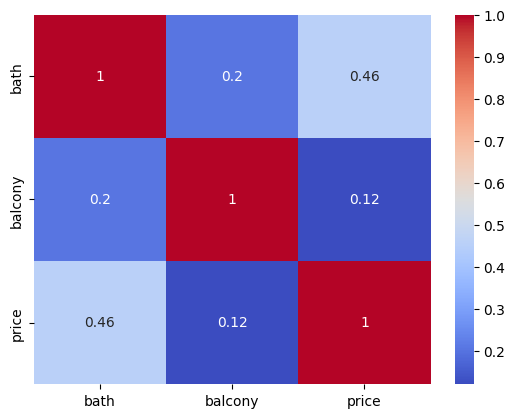

In [26]:
num_vars=['bath','balcony','price']
sns.heatmap(df[num_vars].corr(),cmap="coolwarm",annot=True)

## prepare Data for Machine Leearning model

### Data cleaning

In [ ]:
# find the missing values of the dataset

In [27]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [28]:
# remove the missing value and added the mean value of their places

In [30]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [31]:
# drop the society because of lot of missing value

In [32]:
df1=df.drop('society',axis='columns')

In [33]:
df1.shape

(13320, 8)

In [34]:
# fill mean value in the balcony feature because of it contain some missing value

In [36]:
df1['balcony']=df1['balcony'].fillna(df1['balcony'].mean())

In [37]:
df1.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

## remove null values

In [38]:
df2=df1.dropna()
df2.shape

(13246, 8)

In [39]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [40]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


# Feature Engineering

In [42]:
# To show all the columns and rows

In [43]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [44]:
# converting total_sqft feature in numeric

In [45]:
df2['total_sqft'].value_counts()

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225                  48


In [46]:
total_sqft_int=[]
for str_val in df2['total_sqft']:
    try:
        total_sqft_int.append(float(str_val))
    except:
        try:
            temp=[]
            temp=str_val.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2)
        except:
            total_sqft_int.append(np.nan)

In [47]:
# rest the index of dataframe

In [48]:
df3=df2.reset_index(drop=True)

In [49]:
df4=df3.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [50]:
df4.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0
13245,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0


In [52]:
df4.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [53]:
df5=df4.dropna()
df5.shape

(13200, 9)

In [57]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [58]:
df5['size'].value_counts()

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [59]:
# remove sufix text

In [60]:
size_int=[]
for str_val in df5['size']:
    temp=[]
    temp=str_val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)
        print("notice =",str_val)

In [61]:
df5=df5.reset_index(drop=True)

In [63]:
df6=df5.join(pd.DataFrame({'bhk':size_int}))
df6.shape

(13200, 10)

In [64]:
df6.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


# finding Outlier and Removing

In [76]:
import scipy.stats as stats
def diagostic_plots(df,variable):
    plt.figure(figsize=(16,4))
    #histogram
    plt.subplot(1,3,1)
    sns.distplot(df[variable],bins=30)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.ylabel("variable quantiles")
    
    # boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

In [79]:
import warnings 
warnings.filterwarnings('ignore')


*********** bath ************


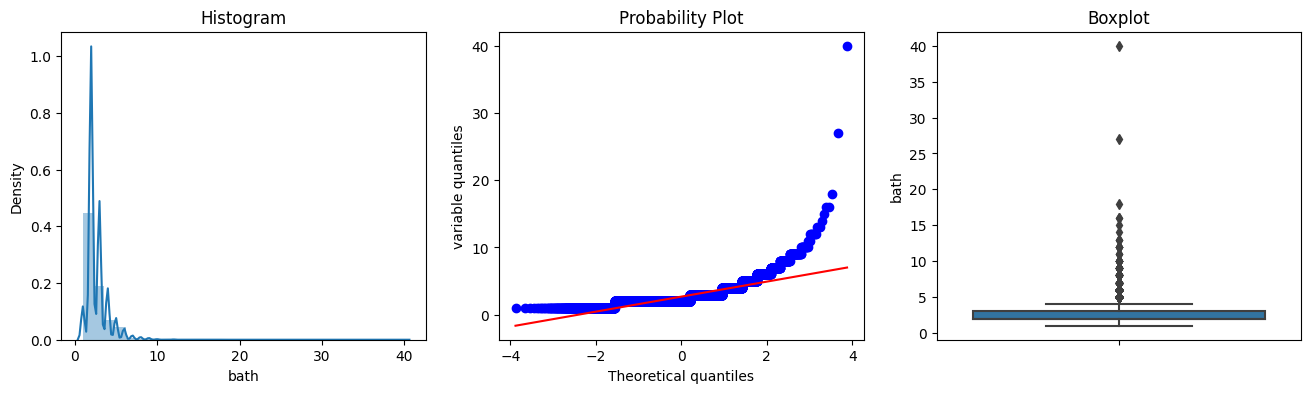

*********** balcony ************


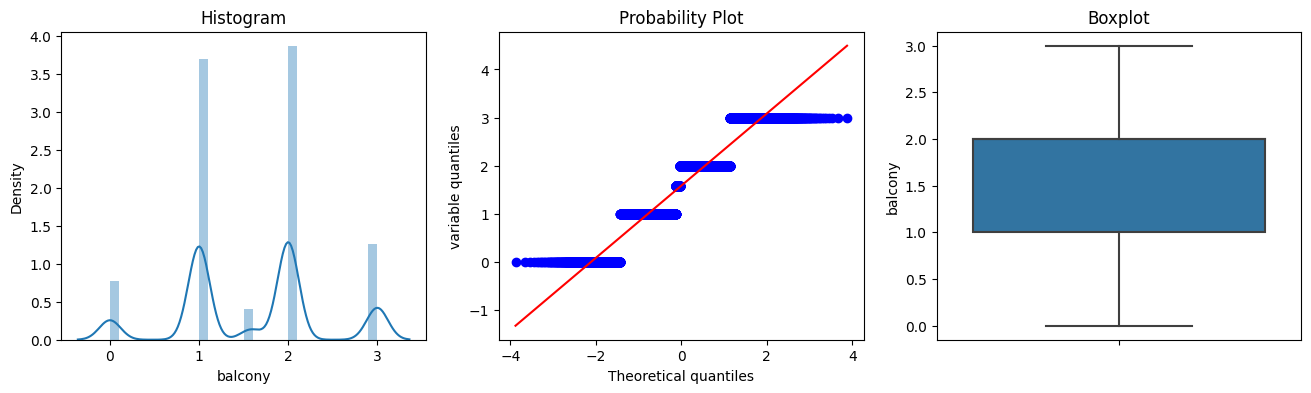

*********** total_sqft_int ************


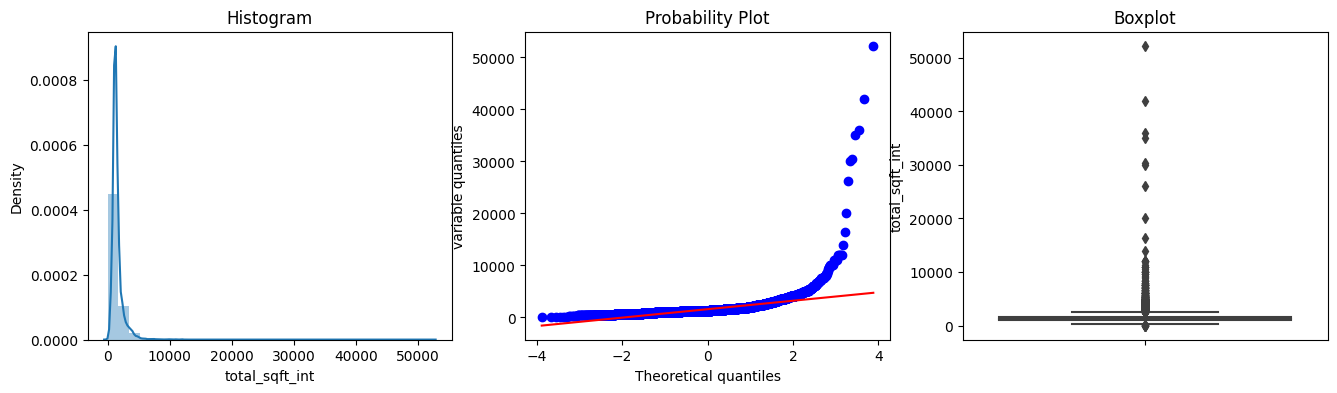

*********** bhk ************


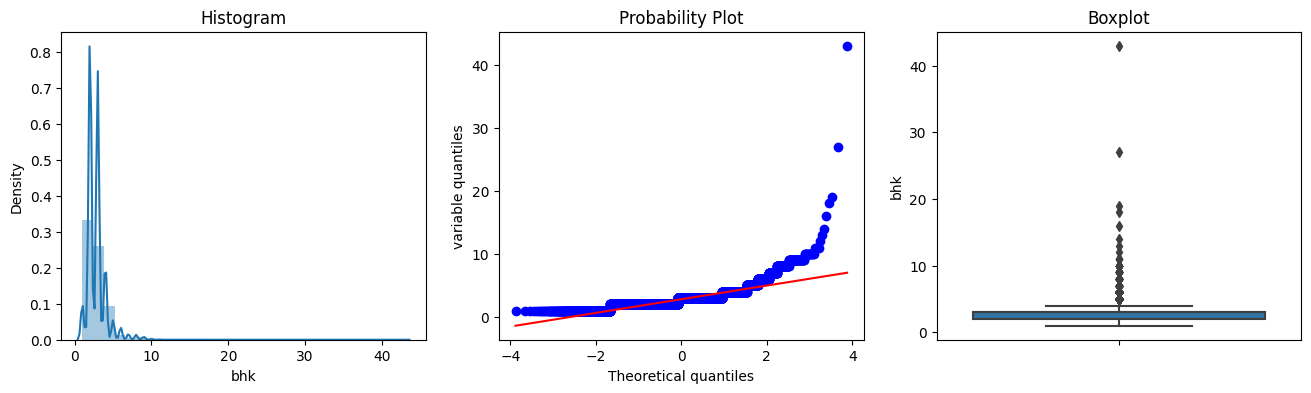

*********** price ************


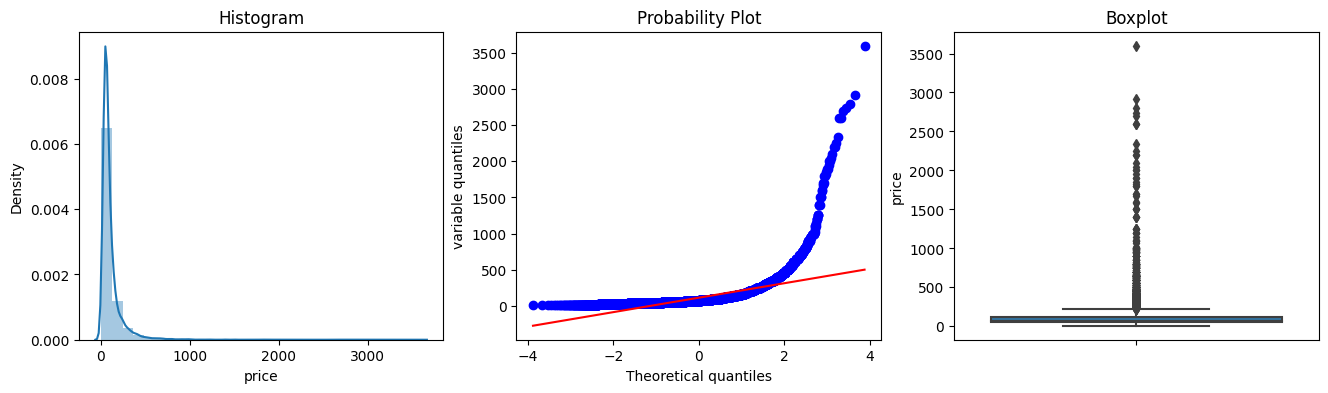

In [80]:
num_var=['bath','balcony','total_sqft_int','bhk','price']
for var in num_var:
    print("*********** {} ************".format(var))
    diagostic_plots(df6,var)

In [82]:
# 1 bhk required min 350 sqft are

In [84]:
df5[df6['total_sqft_int']/df6['bhk']<350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0


In [ ]:
# 1 bhk <350 sqft remove them 

In [87]:
df7=df6[~(df6['total_sqft_int']/df6['bhk']<350)]
df7.shape

(12106, 10)

In [89]:
df7['price_per_sqft'] = df7['price']*100000/df7['total_sqft_int']
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [90]:
df7.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [91]:
# removing outliers

In [99]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
    
df8 =remove_pps_outliers(df7)
df8.shape

(8888, 11)

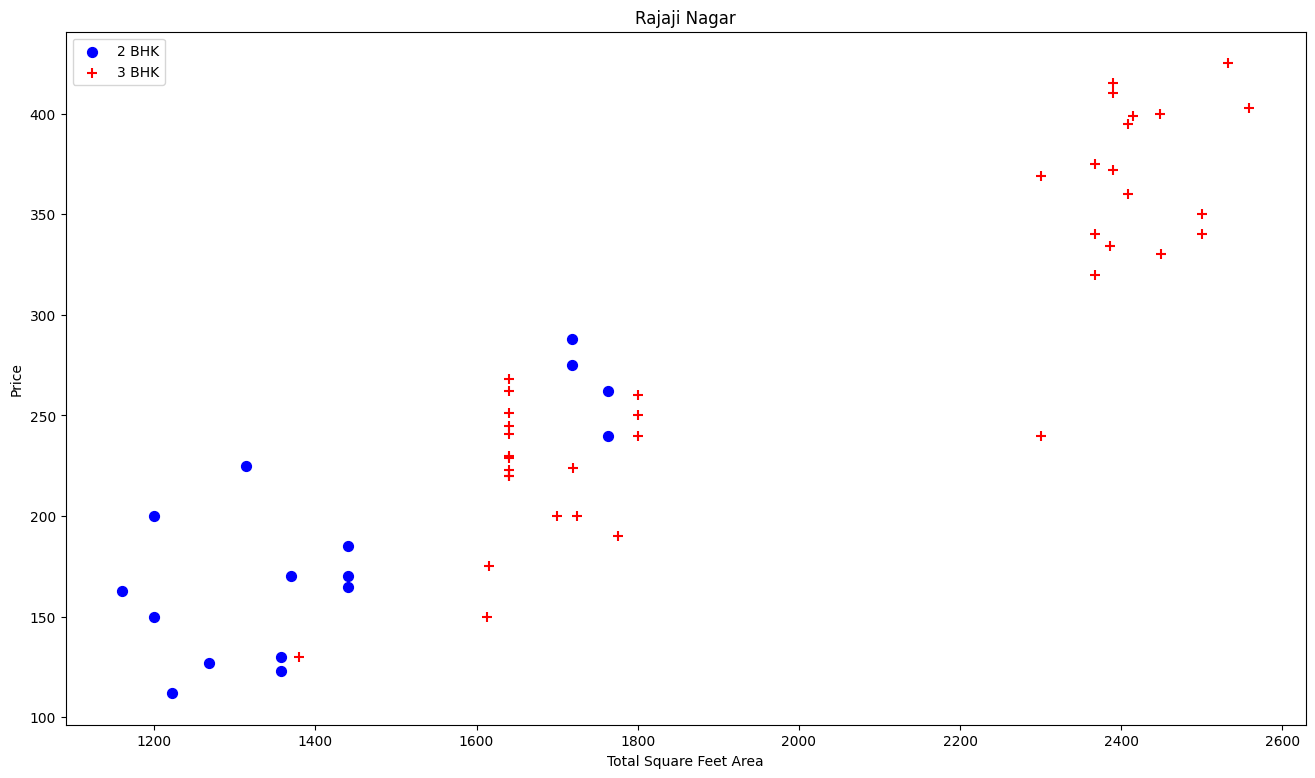

In [101]:
def plot_scatter_chart(df, location):
    bhk2 =df[(df.location==location) & (df.bhk==2)]
    bhk3= df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(16,9))
    plt.scatter (bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df8, "Rajaji Nagar")

